In [60]:
import torch
torch.__version__

'2.9.0+cpu'

In [61]:
what_were_covering = {
    1:'data(prepare and load)',
    2:'build model',
    3:'fitting the model to data (training)',
    4:'making predictions and evaluating a model (inference)',
    5:'saving and loading a model',
    6:'putting it all together'
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [62]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.9.0+cpu'

In [63]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
# print(X.shape)
# X.unsqueeze(dim=1)
# print(X.shape)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [64]:
X.shape

torch.Size([50, 1])

In [65]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [66]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

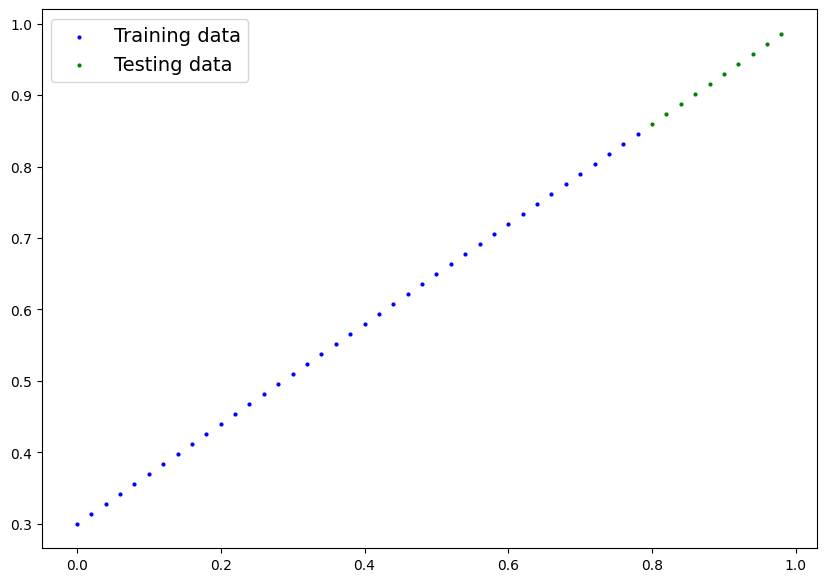

In [67]:
plot_predictions()

In [68]:
# 创建一个线性回归模型类
class LinearRegressionModel(nn.Module):# PyTorch中的几乎一切都是一个nn.Module（将其视为神经网络积木）
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, # 以随机权重开始(随着模型的学习,这些权重将会调整)
                                               dtype=torch.float),# pytorch喜欢默认float32
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float),
                                 requires_grad=True)

     # forward定义了模型中的计算
    def forward(self, x: torch.Tensor) -> torch.Tensor: #x 是输入数据(比如训练数据/测试数据)
        return self.weight * x + self.bias   # 线性回归方程(y = m*x + b)

# Pytorch模型构建基础

PyTorch 有四个（或多或少）基本模块，你可以使用它们来创建几乎你能想象到的任何类型的神经网络。

它们是 torch.nn 、 torch.optim 、 torch.utils.data.Dataset 和 torch.utils.data.DataLoader 。

torch.nn:

包含计算图的全部构建模块(本质上是一系列以特定方式执行的计算)


---


torch.nn.Parameter:

存储可用于 nn.Module 的张量。如果 requires_grad=True 梯度（用于通过梯度下降更新模型参数）自动计算，这通常被称为“自动求导”。


---


torch.nn.Module:


所有神经网络模块的基类，所有神经网络的构建模块都是其子类。如果你在 PyTorch 中构建神经网络，你的模型应该继承 nn.Module 。需要实现 forward() 方法。


---

torch.optim:

包含各种优化算法（这些算法告诉模型参数存储在 nn.Parameter 如何最佳地改变以改进梯度下降，进而减少损失）。



---

def forward():

所有 nn.Module 子类都需要一个 forward() 方法，这个方法定义了对传递给特定 nn.Module 的数据进行的计算（例如上面提到的线性回归公式）。

In [69]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [71]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

In [72]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


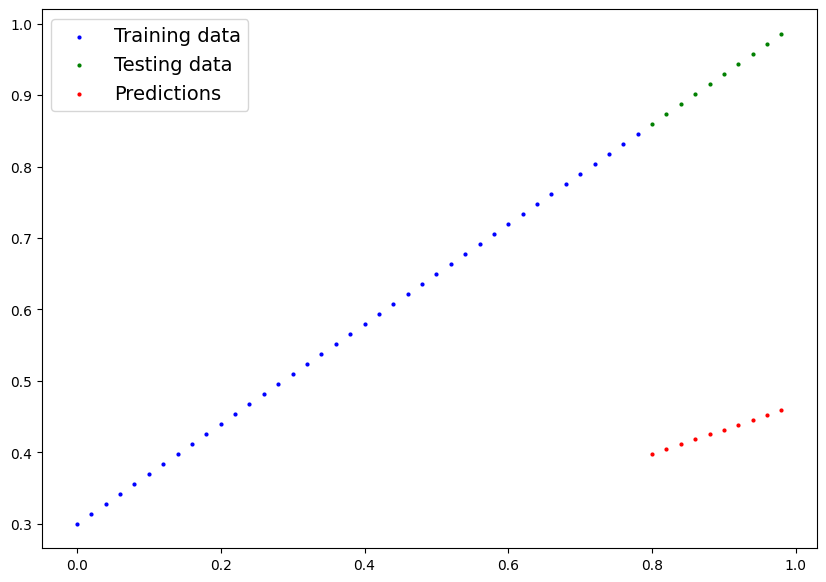

In [73]:
plot_predictions(predictions=y_preds)

In [74]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

# 在 PyTorch 中创建损失函数和优化器

为了让我们的模型能够自行更新其参数，我们需要在我们的方法中添加一些其他的东西。那就是一个损失函数以及一个优化器。


---


### Loss function  损失函数:

    它做什么:衡量你的模型的预测（例如 y_preds ）与真实标签（例如 y_test ）相比有多错误。越低越好。

    它在Pytorch中的位置:PyTorch 在 torch.nn 中提供了许多内置的损失函数。
    
    常见值:回归问题的平均绝对误差（MAE）（ torch.nn.L1Loss() ）。二分类问题的二元交叉熵（ torch.nn.BCELoss() ）


### Optimizer  优化器:

    它做什么:告诉你的模型如何更新其内部参数以最佳地降低损失。

    它在Pytorch中的位置:你可以在 torch.optim 中找到各种优化函数的实现。
    
    常见值:随机梯度下降（ torch.optim.SGD() ）。Adam 优化器（ torch.optim.Adam() ）。



In [75]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)
#

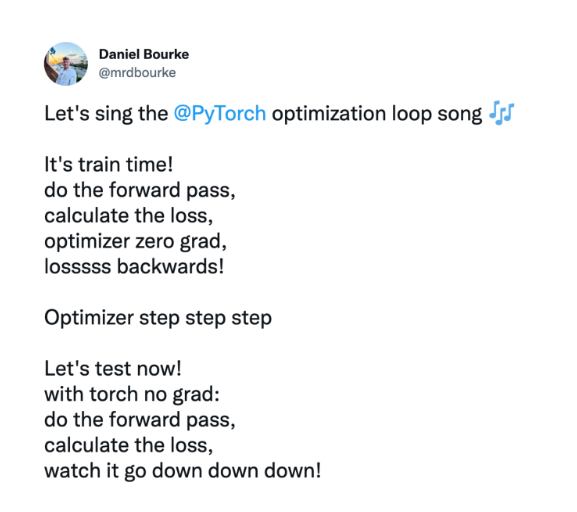

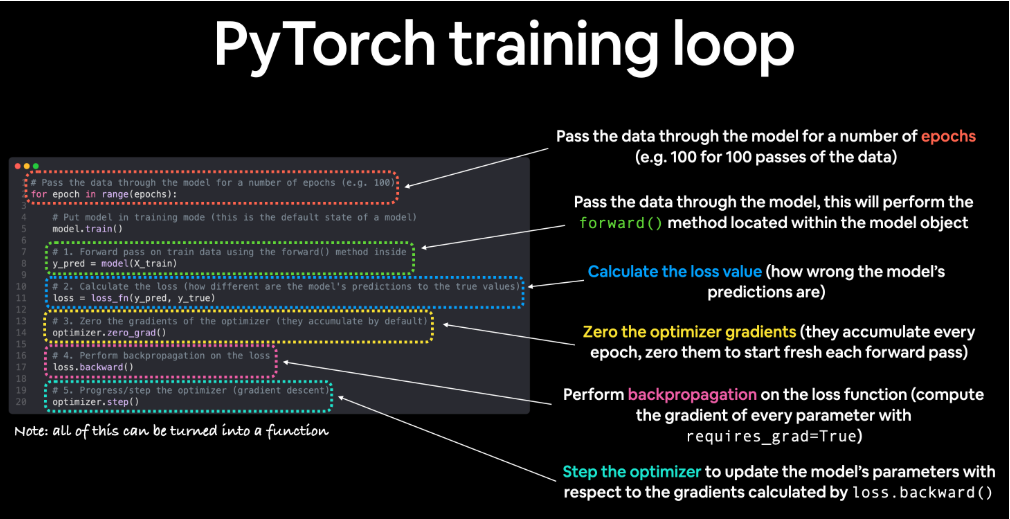

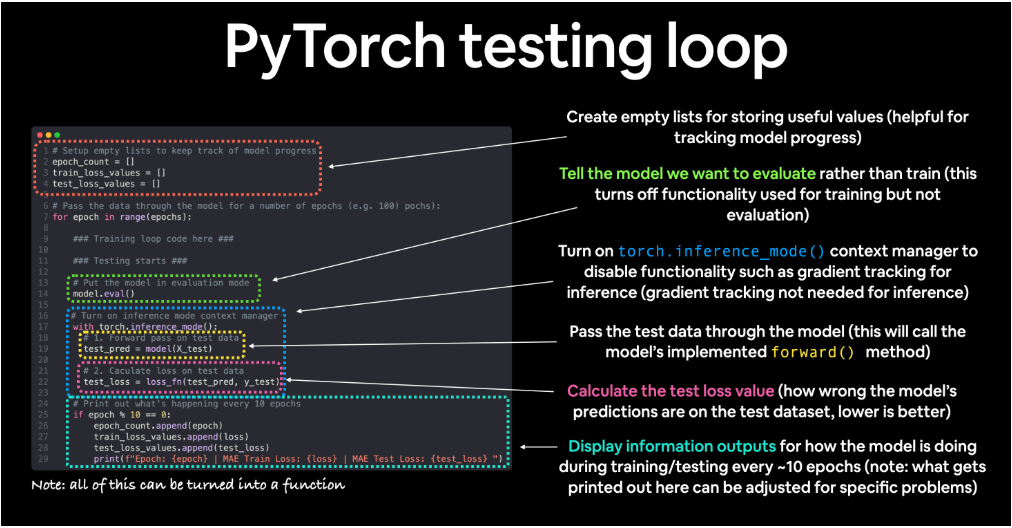

In [76]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            # print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

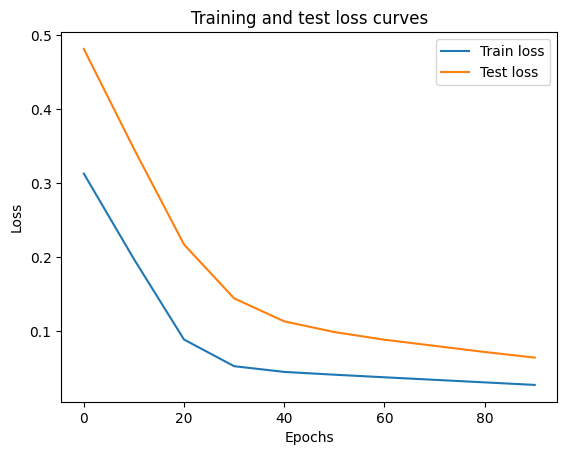

In [77]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [78]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.5784], requires_grad=True),
 Parameter containing:
 tensor([0.3513], requires_grad=True)]

In [79]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [80]:
# 1. Set the model in evaluation mode
model_0.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

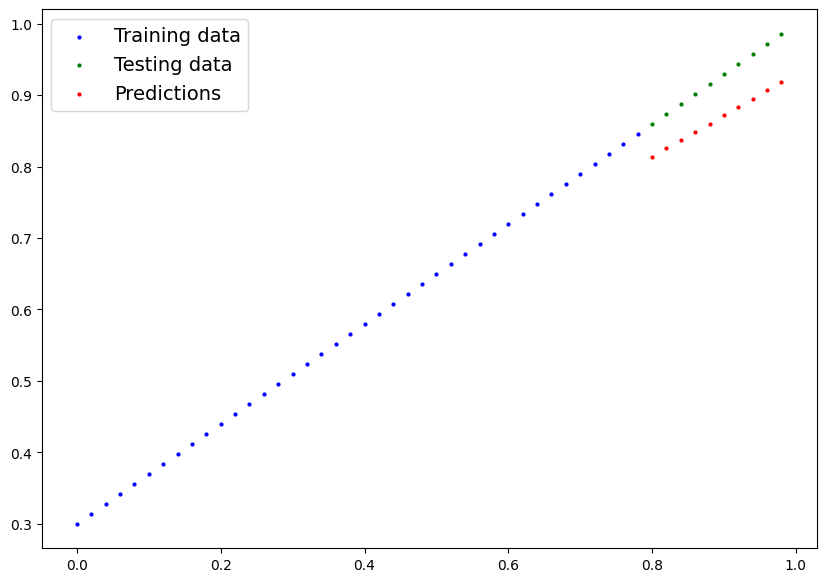

In [81]:
plot_predictions(predictions=y_preds)

#  保存和加载PyTorch模型

## torch.save
    使用 Python 的 pickle 工具将序列化对象保存到磁盘。模型、张量以及字典等各种其他 Python 对象都可以使用 torch.save 进行保存。

## torch.load
    使用 pickle 的解封存功能来反序列化并加载封存的 Python 对象文件（如模型、张量或字典）到内存中。你也可以设置将对象加载到哪个设备（CPU、GPU 等）。
    

## torch.nn.Module.load_state_dict
    使用保存的 state_dict() 对象加载模型的参数字典 ( model.state_dict() )。

In [82]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
# only saving the state_dict() only saves the models learned parameters
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [83]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Jan 28 05:06 models/01_pytorch_workflow_model_0.pth


In [86]:
load_model_0 = LinearRegressionModel()

load_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [87]:
load_model_0.eval()

with torch.inference_mode():
    load_model_preds = load_model_0(X_test)

In [88]:
y_preds == load_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device:{device}")

Using device:cuda


In [14]:
# 设置一些参数
weight = 0.76
bias = 0.37

x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * x + bias

x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3700],
         [0.3852],
         [0.4004],
         [0.4156],
         [0.4308],
         [0.4460],
         [0.4612],
         [0.4764],
         [0.4916],
         [0.5068]]))

In [15]:
train_split = int(0.8 * len(x))
X_train,Y_train = x[:train_split],y[:train_split]
X_test,Y_test = x[train_split:],y[train_split:]

len(X_train)

40

In [16]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype = float),
                                    requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype = float),
                                 requires_grad = True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [17]:
torch.cuda.manual_seed(42)

model_0 = LinearRegressionModel()

model_0,model_0.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([-0.5387], dtype=torch.float64)),
              ('bias', tensor([-0.3533], dtype=torch.float64))]))

In [18]:
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None,):
    plt.figure(figsize = (10, 7))

    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'training')

    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'testing')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'prediction')

    plt.legend(prop = {'size': 14})

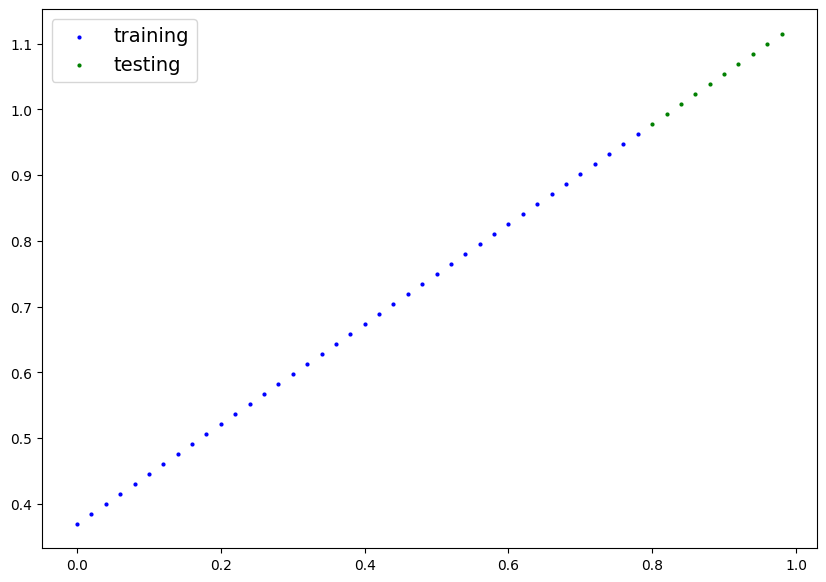

In [19]:
plot_predictions(X_train,Y_train,X_test,Y_test)

In [21]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [22]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [24]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [26]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                          lr = 0.01)


In [29]:
%%time
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    # 将模型设置为训练模式
    model_1.train()

    # 前向计算
    y_pred = model_1(X_train)

    # 计算损失
    loss = loss_fn(y_pred, Y_train)

    # 重置优化器的梯度为0
    optimizer.zero_grad()

    # 反向传播,更新模型参数
    loss.backward()

    # 执行优化器
    optimizer.step()

    # 将模型设置为测试模式
    model_1.eval()

    # 前向计算
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 计算损失
        test_loss = loss_fn(test_pred,Y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 100 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 200 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 300 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 400 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 500 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 600 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 700 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 800 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
Epoch: 900 | Train loss: 0.0075625027529895306 | Test loss: 0.008403814397752285
CPU times: user 969 ms, sys: 29 ms, total: 997 ms
Wall time: 1.15 s


In [30]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7550]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3795], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.76, bias: 0.37


In [31]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.9835],
        [0.9986],
        [1.0137],
        [1.0288],
        [1.0439],
        [1.0590],
        [1.0741],
        [1.0892],
        [1.1043],
        [1.1194]], device='cuda:0')

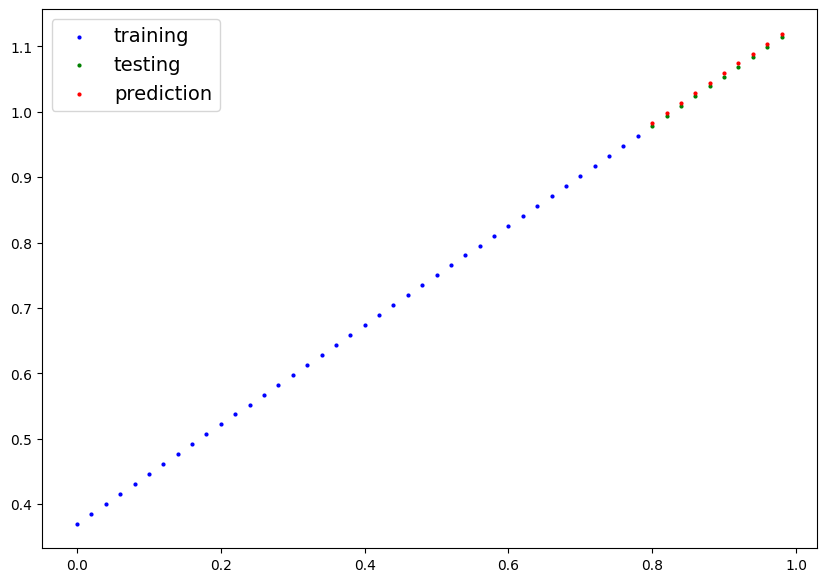

In [32]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(predictions=y_preds.cpu())

In [33]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [34]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [35]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')